# Density-based clustering

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN

In [15]:
#Reading data set
wholesale = pd.read_csv("wholesale.csv")
x = wholesale.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
wholesale.info()
wholesale[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


target  dbscan_cluster
1       -1                298
2       -1                142
Name: dbscan_cluster, dtype: int64


<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

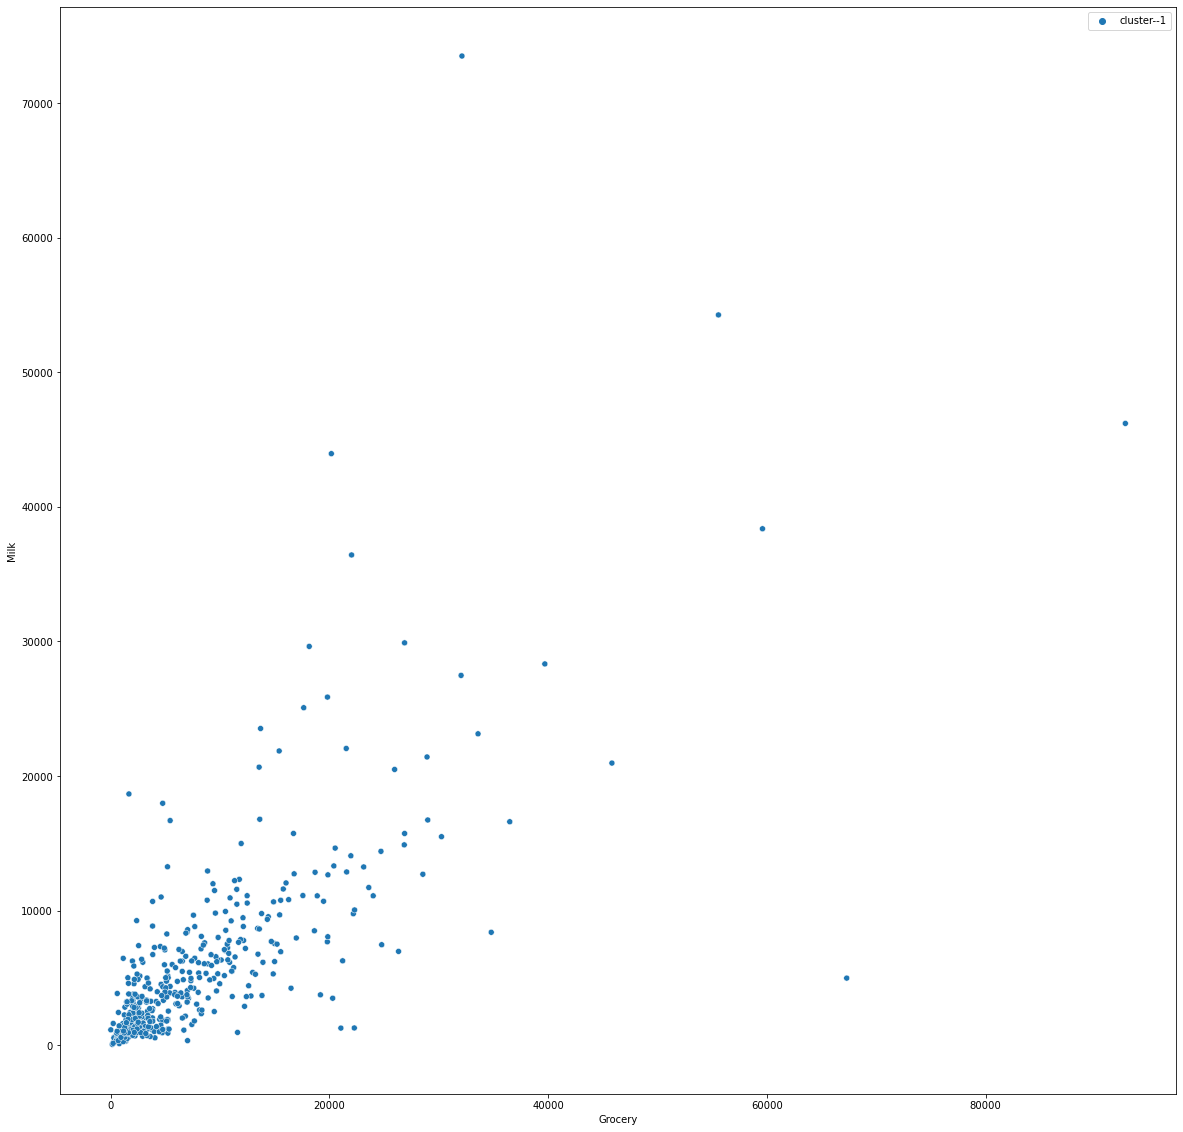

In [25]:
#Remove 'Channel' and 'Region' columns from dataframe
wholesale_DBS = wholesale.iloc[ : , 1:8]

#DBSCAN clustering
#eps : the furthest distance at which a point will pick its neighbours.
#I.e. this will decide how many neighbours a point will discover.
dbscan = DBSCAN(eps=0.6, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(wholesale_DBS)

wholesale_DBS['dbscan_cluster'] = dbscan_labels
wholesale_DBS['target'] = wholesale.Channel
wholesale_result = wholesale_DBS.groupby(['target'])['dbscan_cluster'].value_counts()

print(wholesale_result)
#Result: 
#DBSCAN clustering is evaluated against the target groups
#2 clusters were identified, denoted by 0 and 1
#-1 means noisy data (outliers)

#Visualizing DBSCAN clusters
fig = plt.figure(figsize=(20, 20))
sns.scatterplot(x="Grocery",y="Milk", data=wholesale_DBS, 
                hue=['cluster-{}'.format(x) for x in dbscan_labels])